# Семинар 1. Введение в NLP и предобработка текста

### План семинара
1. Токенизация
2. Стоп-слова и пунктуация
3. Лемматизация и стемминг
4. Bag-of-words и TF-IDF
5. Решение задачи с текстовыми данными
6. Регулярные выражения

## 1. Токенизация

Токенизировать - значит, поделить текст на слова, или *токены*. Самый наивный способ токенизировать текст - разделить на слова по пробелам с помощью `split`. Но `split` упускает очень много всего, например, не отделяет пунктуацию от слов. Кроме этого есть ещё много менее тривиальных проблем, которые мы обсудим по ходу семинара, поэтому на практике всегда используют готовые токенизаторы.

In [ ]:
# !pip install nltk

In [1]:
import warnings

import nltk
import pandas as pd
from nltk.tokenize import word_tokenize

warnings.filterwarnings("ignore")

In [2]:
nltk.download("punkt_tab", quiet=True)

True

In [5]:
example = "Но не каждый хочет что-то исправлять:("

In [ ]:
# c помощью split()
example.split()

['Но', 'не', 'каждый', 'хочет', 'что-то', 'исправлять:(']

In [ ]:
# c помощью токенизатора
word_tokenize(example)

['Но', 'не', 'каждый', 'хочет', 'что-то', 'исправлять', ':', '(']

В nltk вообще есть довольно много токенизаторов:

In [ ]:
from nltk import tokenize

dir(tokenize)[:16]

['BlanklineTokenizer',
 'LegalitySyllableTokenizer',
 'LineTokenizer',
 'MWETokenizer',
 'NLTKWordTokenizer',
 'PunktSentenceTokenizer',
 'PunktTokenizer',
 'RegexpTokenizer',
 'ReppTokenizer',
 'SExprTokenizer',
 'SpaceTokenizer',
 'StanfordSegmenter',
 'SyllableTokenizer',
 'TabTokenizer',
 'TextTilingTokenizer',
 'ToktokTokenizer']

Можно получить индексы начала и конца каждого токена:

In [ ]:
wh_tok = tokenize.WhitespaceTokenizer()
list(wh_tok.span_tokenize(example))

[(0, 2), (3, 5), (6, 12), (13, 18), (19, 25), (26, 38)]

Некоторые токенизаторы ведут себя специфично:

In [ ]:
tokenize.TreebankWordTokenizer().tokenize("don't stop me")

['do', "n't", 'stop', 'me']

Для некоторых задач это может быть полезно.

А некоторые предназначены вообще не для текста на естественном языке:

In [ ]:
tokenize.SExprTokenizer().tokenize("(a (b c)) d e (f)")

['(a (b c))', 'd', 'e', '(f)']

Есть токенизатор, который может быть полезен для работы с твитами или сообщениями из соц. сетей. Он сохранит смайлики, хештеги и т.п.

In [6]:
from nltk.tokenize import TweetTokenizer

tw = TweetTokenizer()
tw.tokenize(example)

['Но', 'не', 'каждый', 'хочет', 'что-то', 'исправлять', '(', '(']

| **Токенайзер**               | **Описание**                                                                                                                                                         | **Особенности / Примечания**                                                                 |
|------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| `word_tokenize`              | Универсальный токенайзер для английского (на основе `TreebankWordTokenizer` + `PunktSentenceTokenizer`).                                                           | Хорош для общего использования, обрабатывает сокращения и пунктуацию.                      |
| `sent_tokenize`              | Делит текст на предложения. Использует обученную модель `Punkt`.                                                                                                    | Поддержка разных языков (можно загрузить соответствующую модель через `nltk.download`).    |
| `WordPunctTokenizer`         | Разбивает слова и пунктуацию с помощью регулярных выражений.                                                                                                       | Прост и быстр, но не обрабатывает сокращения.                                               |
| `TreebankWordTokenizer`      | Токенизирует по правилам Penn Treebank.                                                                                                                             | Хорошо работает с английским, разбивает «don't» на `do` и `n't`.                           |
| `PunktSentenceTokenizer`     | Обучаемый токенайзер предложений.                                                                                                                                    | Учитывает аббревиатуры, имена, сокращения. Используется внутри `sent_tokenize`.            |
| `TweetTokenizer`             | Адаптирован для текстов из соцсетей (Twitter).                                                                                                                     | Учитывает эмодзи, хэштеги, повторения символов и т. п.                                      |
| `RegexpTokenizer`            | Пользователь может задать регулярное выражение для извлечения токенов.                                                                                             | Гибкость при нестандартной структуре текста.                                                |
| `MWETokenizer`               | Многословные выражения (Multi-Word Expressions), задаются вручную (например, `('New', 'York')`).                                                                   | Полезен для задач NER, где нужно сохранить устойчивые фразы как единый токен.              |
| `TextTilingTokenizer`        | Делит текст на тематически однородные сегменты.                                                                                                                    | Используется для анализа структуры больших текстов, например, статей.                      |
| `WhitespaceTokenizer`        | Разбивает текст только по пробелам.                                                                                                                                 | Очень простой, не обрабатывает пунктуацию.                                                  |
| `BlanklineTokenizer`         | Делит текст на параграфы по пустым строкам.                                                                                                                        | Полезен для предварительной обработки при работе с документами.                            |
| `LineTokenizer`              | Делит текст по строкам (по символу перевода строки).                                                                                                               | Полезен при работе с логами, списками.                                                      |
| `SpaceTokenizer`             | Разделение только по пробелу `' '`.                                                                                                                                 | Отличается от `WhitespaceTokenizer`, так как не учитывает табуляции.                       |
| `TabTokenizer`               | Разделение по табуляции.                                                                                                                                           | Узкоспециализированный.                                                                    |
| `SyllableTokenizer`          | Токенизация по слогам, основанная на сонорности.                                                                                                                   | Используется в лингвистических исследованиях.                                               |
| `LegalitySyllableTokenizer`  | Также для слогов, но основан на принципе легальности и максимизации онсета (начального созвучия).                                                                 | Теоретически обоснованная модель слоговой структуры.                                        |
| `StanfordSegmenter`          | Интерфейс к внешнему инструменту — Stanford NLP Segmenter (Java). Поддерживает китайский, арабский и другие языки.                                                | Требует установки Stanford NLP и Java.                                                      |
| `ToktokTokenizer`            | Порт популярного токенизатора с Perl (`tok-tok.pl`).                                                                                                               | Универсальный токенайзер, подходит для многих языков.                                       |
| `ReppTokenizer`              | Обёртка над REPP (Rule-based English Preprocessing Pipeline) — токенайзером на основе правил для английского.                                                    | Требует установки REPP (написан на C++), может использоваться для точной разметки корпуса. |
| `SExprTokenizer`             | Разделяет текст по s-выражениям (для лиспоподобных структур).                                                                                                      | Полезен при обработке парсеров и синтаксических деревьев.                                  |
| `TreebankWordDetokenizer`    | Объединяет токены обратно в строку по правилам Treebank.                                                                                                           | Противоположен `TreebankWordTokenizer`.                                                     |                                                                                                                        

## 2. Стоп-слова и пунктуация

*Стоп-слова* — это слова, которые часто встречаются практически в любом тексте и ничего интересного не говорят о конретном документе, то есть играют роль шума. Поэтому их принято убирать. По той же причине убирают и пунктуацию.

In [7]:
nltk.download("stopwords", quiet=True)

True

In [8]:
from nltk.corpus import stopwords

print(stopwords.words("russian"))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [ ]:
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [10]:
from string import punctuation

punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'


| Константа               | Описание                                           |
|--------------------------|----------------------------------------------------|
| `ascii_letters`          | `'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'` |
| `ascii_lowercase`        | `'abcdefghijklmnopqrstuvwxyz'`                      |
| `ascii_uppercase`        | `'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`                      |
| `digits`                 | `'0123456789'`                                     |
| `hexdigits`              | `'0123456789abcdefABCDEF'`                         |
| `octdigits`              | `'01234567'`                                       |
| `punctuation`            | `'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'`              |
| `printable`              | Все печатные символы (включая пробел и пунктуацию) |
| `whitespace`             | `' \t\n\r\x0b\x0c'` (все пробельные символы)        |

In [11]:
noise = stopwords.words("russian") + list(punctuation)

In [ ]:
noise

## 3. Лемматизация и стемминг
### 3.1 Лемматизация

[**Лемматизация**](https://en.wikipedia.org/wiki/Lemmatisation) — процесс приведения слова к его нормальной форме (**лемме**):
- для существительных — именительный падеж, единственное число;
- для прилагательных — именительный падеж, единственное число, мужской род;
- для глаголов, причастий, деепричастий — глагол в инфинитиве.

Например, токены «пью», «пил», «пьет» перейдут в «пить». Почему это хорошо?
* Во-первых, мы хотим рассматривать как отдельный признак каждое *слово*, а не каждую его отдельную форму.
* Во-вторых, некоторые стоп-слова стоят только в начальной форме, и без лемматизации выкидываем мы только её.

Для русского есть два хороших лемматизатора: `mystem` и `pymorphy`.

#### [Mystem](https://tech.yandex.ru/mystem/)

Mystem — это пример популярной библиотеки для лемматизации. Как с ним работать:
* скачать mystem и запускать [из терминала с разными параметрами](https://tech.yandex.ru/mystem/doc/)
* использовать обёртку для питона [pymystem3](https://pythonhosted.org/pymystem3/pymystem3.html) (она медленнее, но удобнее в использовании)

In [14]:
!pip install pymystem3

In [15]:
from pymystem3 import Mystem

mystem_analyzer = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


Мы инициализировали Mystem c дефолтными параметрами. А вообще параметры есть такие:
* mystem_bin — путь к `mystem`, если их несколько
* grammar_info — нужна ли грамматическая информация или только леммы (по умолчанию нужна)
* disambiguation — нужно ли снятие [омонимии](https://ru.wikipedia.org/wiki/%D0%9E%D0%BC%D0%BE%D0%BD%D0%B8%D0%BC%D1%8B) - дизамбигуация (по умолчанию нужна)

*Дизамбигуация - разрешение лексической многозначности, способ выбора точного значения слова из имеющихся омонимов с учетом окружающего контекста*

* entire_input — нужно ли сохранять в выводе все (пробелы, например), или можно выкинуть (по умолчанию оставляется все)

Методы Mystem принимают строку, токенизатор вшит внутри. Можно, конечно, и пословно анализировать, но тогда он не сможет учитывать контекст.

Можно просто лемматизировать текст:

In [ ]:
print(mystem_analyzer.lemmatize(example))

['но', ' ', 'не', ' ', 'каждый', ' ', 'хотеть', ' ', 'что-то', ' ', 'исправлять', ':(\n']


### [Pymorphy](http://pymorphy2.readthedocs.io/en/latest/)
Это модуль на питоне, довольно быстрый и с кучей функций.

In [16]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 70.1 MB/s eta 0:00:00


In [17]:
from pymorphy3 import MorphAnalyzer

In [18]:
pymorphy3_analyzer = MorphAnalyzer()

pymorphy3 работает с отдельными словами. Если дать ему на вход предложение, то он его просто не лемматизирует, т.к. не понимает.

Метод MorphAnalyzer.parse() принимает слово и возвращает все возможные его разборы.

У каждого разбора есть тег. Тег — это набор граммем, характеризующих данное слово. Например, тег 'VERB,perf,intr plur,past,indc' означает, что слово — глагол (VERB) совершенного вида (perf), непереходный (intr), множественного числа (plur), прошедшего времени (past), изъявительного наклонения (indc).


In [ ]:
ana = pymorphy3_analyzer.parse("хочет")
ana

[Parse(word='хочет', tag=OpencorporaTag('VERB,impf,tran sing,3per,pres,indc'), normal_form='хотеть', score=1.0, methods_stack=((DictionaryAnalyzer(), 'хочет', 3136, 5),))]

In [ ]:
ana[0].normal_form

'хотеть'

### Теги MorphAnalyzer

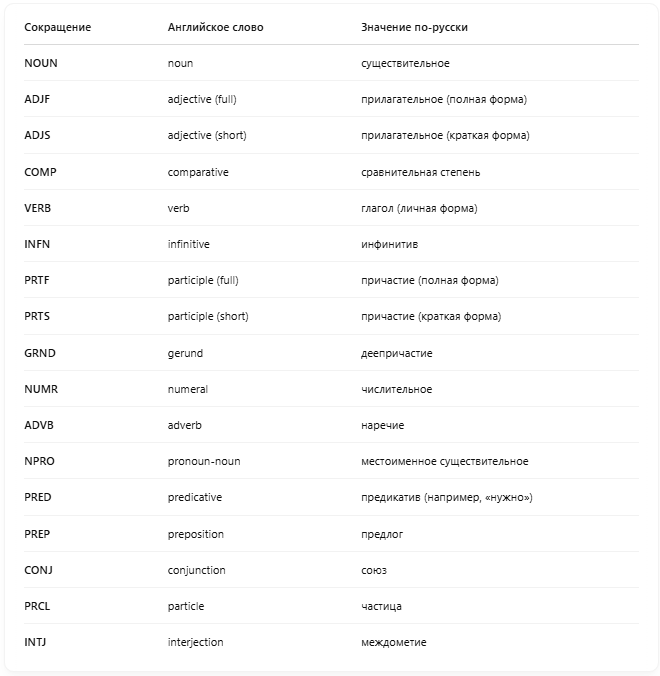

Граммемы (морфологические признаки):

| Сокр.     | Английское слово      | Значение по-русски                     |
|-----------|------------------------|----------------------------------------|
| **masc**  | masculine              | мужской род                            |
| **femn**  | feminine               | женский род                            |
| **neut**  | neuter                 | средний род                            |
| **sing**  | singular               | единственное число                     |
| **plur**  | plural                 | множественное число                    |
| **nomn**  | nominative             | именительный падеж                     |
| **gent**  | genitive               | родительный падеж                      |
| **datv**  | dative                 | дательный падеж                        |
| **accs**  | accusative             | винительный падеж                      |
| **ablt**  | instrumental           | творительный падеж                     |
| **loct**  | locative               | предложный падеж                       |
| **voct**  | vocative               | звательный падеж (устаревшее)         |
| **gen2**  | second genitive        | второй родительный                     |
| **acc2**  | second accusative      | второй винительный                     |
| **loc2**  | second locative        | второй предложный                      |
| **perf**  | perfective             | совершенный вид                        |
| **impf**  | imperfective           | несовершенный вид                      |
| **tran**  | transitive             | переходный                             |
| **intr**  | intransitive           | непереходный                           |
| **pres**  | present                | настоящее время                        |
| **past**  | past                   | прошедшее время                        |
| **futr**  | future                 | будущее время                          |
| **1per**  | first person           | первое лицо                            |
| **2per**  | second person          | второе лицо                            |
| **3per**  | third person           | третье лицо                            |
| **indc**  | indicative             | изъявительное наклонение               |
| **impr**  | imperative             | повелительное наклонение               |
| **actv**  | active                 | действительный залог                   |
| **pssv**  | passive                | страдательный залог                    |
| **incl**  | inclusive              | включающее (мы = я + ты) (редко)       |
| **excl**  | exclusive              | исключающее (мы ≠ ты) (редко)          |
| **anim**  | animate                | одушевлённое                           |
| **inan**  | inanimate              | неодушевлённое                         |


### mystem vs. pymorphy

1) *Надеемся, что вы пользуетесь линуксом или маком* — mystem работает невероятно медленно под windows на больших текстах

2) *Снятие омонимии*. Mystem умеет снимать омонимию по контексту (хотя не всегда преуспевает), pymorphy3 берет на вход одно слово и соответственно вообще не умеет дизамбигуировать по контексту.

In [ ]:
homonym1 = "За время обучения я прослушал больше сорока курсов."
homonym2 = "Сорока своровала блестящее украшение со стола."

# корректно определил части речи
# NUM — числительное
# S — существительное
print(mystem_analyzer.analyze(homonym1)[-5])
print(mystem_analyzer.analyze(homonym2)[0])

{'analysis': [{'lex': 'сорок', 'wt': 0.8710292664, 'gr': 'NUM=(пр|дат|род|твор)'}], 'text': 'сорока'}
{'analysis': [{'lex': 'сорока', 'wt': 0.1210970041, 'gr': 'S,жен,од=им,ед'}], 'text': 'Сорока'}


### 3.2 Стемминг

В отличие от лемматизации, при применении стемминга у всех слов отбрасываются аффиксы (окончания и суффиксы), что необязательно приводит слова к формам, существующим в рассматриваемом языке. [**Snowball**](http://snowball.tartarus.org/) — фрэймворк для написания алгоритмов стемминга. Алгоритмы стемминга отличаются для разных языков и используют знания о конкретном языке: списки окончаний для разных частей речи, разных склонений и т.д.

In [19]:
from nltk.stem.snowball import SnowballStemmer

In [20]:
tokenized_example = word_tokenize(example)

In [21]:
stemmer = SnowballStemmer("russian")
stemmed_example = [stemmer.stem(w) for w in tokenized_example]
print(" ".join(stemmed_example))

но не кажд хочет что-т исправля ( (


Для английского получится что-то такое.

In [22]:
text = 'In my younger and more vulnerable years my father gave me some advice that I\'ve been turning over in my mind ever since.\n"Whenever you feel like criticizing any one," he told me, "just remember that all the people in this world haven\'t had the advantages that you\'ve had."'
print(text)
text_tokenized = [w for w in word_tokenize(text) if w.isalpha()]
print("==========")
print(text_tokenized)

In my younger and more vulnerable years my father gave me some advice that I've been turning over in my mind ever since.
"Whenever you feel like criticizing any one," he told me, "just remember that all the people in this world haven't had the advantages that you've had."
['In', 'my', 'younger', 'and', 'more', 'vulnerable', 'years', 'my', 'father', 'gave', 'me', 'some', 'advice', 'that', 'I', 'been', 'turning', 'over', 'in', 'my', 'mind', 'ever', 'since', 'Whenever', 'you', 'feel', 'like', 'criticizing', 'any', 'one', 'he', 'told', 'me', 'just', 'remember', 'that', 'all', 'the', 'people', 'in', 'this', 'world', 'have', 'had', 'the', 'advantages', 'that', 'you', 'had']


In [23]:
stemmer = SnowballStemmer("english")
text_stemmed = [stemmer.stem(w) for w in text_tokenized]
print(" ".join(text_stemmed))

in my younger and more vulner year my father gave me some advic that i been turn over in my mind ever sinc whenev you feel like critic ani one he told me just rememb that all the peopl in this world have had the advantag that you had


## 4. Bag-of-words и TF-IDF

Но как же все-таки работать с текстами, используя стандартные методы машинного обучения? Ведь нам нужны объекты выборки, которые описываются числами, а не словами. Иначе говоря, нам нужно *векторизовать* текстовые данные.

### 4.1 Bag-of-words

Пусть у нас имеется коллекция текстов $D = \{d_i\}_{i=1}^l$ и словарь всех слов, встречающихся в выборке $V = \{v_j\}_{j=1}^d.$ В этом случае некоторый текст $d_i$ описывается вектором $(x_{ij})_{j=1}^d,$ где
$$x_{ij} = \sum_{v \in d_i} [v = v_j].$$

Таким образом, текст $d_i$ описывается вектором количества вхождений каждого слова из словаря в данный текст.

In [ ]:
texts = [
    "I like my cat.",
    "My cat is the most perfect cat.",
    "is this cat or is this bread?",
]

In [ ]:
texts_tokenized = [
    " ".join([w for w in word_tokenize(t) if w.isalpha()]) for t in texts
]
texts_tokenized

['I like my cat',
 'My cat is the most perfect cat',
 'is this cat or is this bread']

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(texts_tokenized)

In [ ]:
cnt_vec.vocabulary_.keys()

dict_keys(['like', 'my', 'cat', 'is', 'the', 'most', 'perfect', 'this', 'or', 'bread'])

In [ ]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14 stored elements and shape (3, 10)>

In [ ]:
X.toarray()

array([[0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 2, 1, 0, 1, 1, 0, 1, 1, 0],
       [1, 1, 2, 0, 0, 0, 1, 0, 0, 2]])

In [ ]:
pd.DataFrame(X.toarray(), columns=cnt_vec.get_feature_names_out())

,bread,cat,is,like,most,my,or,perfect,the,this
0,0,1,0,1,0,1,0,0,0,0
1,0,2,1,0,1,1,0,1,1,0
2,1,1,2,0,0,0,1,0,0,2


### Гиперпараметры `CountVectorizer`

1. **`max_df`**: Максимальная частота документа, при которой слово включается в словарь. Например, `max_df=0.95` исключает слова, встречающиеся в более чем 95% документов.

2. **`min_df`**: Минимальная частота документа для включения слова в словарь. Например, `min_df=2` включает только слова, встречающиеся хотя бы в 2 документах.

3. **`max_features`**: Максимальное количество признаков. Например, `max_features=5000` ограничивает словарь до 5000 наиболее частых слов.

4. **`ngram_range`**: Диапазон для n-грамм. Например, `(1, 2)` включает униграммы и биграммы.

5. **`stop_words`**: Удаляет стоп-слова. `'english'` удаляет стандартные английские стоп-слова.

6. **`tokenizer`**: Функция для кастомной токенизации.

7. **`analyzer`**: Определяет, как будет анализироваться текст: по словам, символам или с учётом границ слов.

8. **`decode_error`**: Как обрабатывать ошибки декодирования: `'ignore'`, `'replace'` или `'strict'`.

9. **`lowercase`**: Приводит весь текст к нижнему регистру. По умолчанию **True**.

10. **`vocabulary`**: Словарь, используемый вместо автоматического.

Подбор гиперпараметров:

* Используйте **`GridSearchCV`** для подбора оптимальных значений.
* Начните с **`max_df`**, **`min_df`** и **`ngram_range`** для управления размером словаря.
* Используйте **`max_features`** и **`stop_words`** для уменьшения размерности и улучшения качества модели.

### n-граммы

n-граммы — это последовательности n токенов из исходного текста. В простейшем случае это могут быть последовательности из букв или последовательности из слов. Давайте посмотрим подробнее на примере.

In [ ]:
from nltk import ngrams

In [ ]:
sent = "Если б мне платили каждый раз".split()
list(ngrams(sent, 1))  # униграммы

[('Если',), ('б',), ('мне',), ('платили',), ('каждый',), ('раз',)]

In [ ]:
list(ngrams(sent, 2))  # биграммы

[('Если', 'б'),
 ('б', 'мне'),
 ('мне', 'платили'),
 ('платили', 'каждый'),
 ('каждый', 'раз')]

In [ ]:
list(ngrams(sent, 3))  # триграммы

[('Если', 'б', 'мне'),
 ('б', 'мне', 'платили'),
 ('мне', 'платили', 'каждый'),
 ('платили', 'каждый', 'раз')]

In [ ]:
list(ngrams(sent, 5))  # ... пентаграммы?

[('Если', 'б', 'мне', 'платили', 'каждый'),
 ('б', 'мне', 'платили', 'каждый', 'раз')]

В качестве альтернативы можно пользоваться `CountVectorizer`, который работает так:
* строит для каждого документа (каждой пришедшей ему строки) вектор размерности количества токенов в нашем словаре
* заполняет каждый i-тый элемент количеством вхождений токена в данный документ

Параметр `ngram_range` отвечает за то, какие n-граммы мы используем в качестве фичей:
- `ngram_range=(1, 1)` — униграммы
- `ngram_range=(3, 3)` — триграммы
- `ngram_range=(1, 3)` — униграммы, биграммы и триграммы

### 4.2 TF-IDF

Заметим, что если слово часто встречается в одном тексте, но почти не встречается в других, то оно получает для данного текста большой вес, ровно так же, как и слова, которые часто встречаются в каждом тексте. Для того чтобы разделять эти такие слова, можно использовать статистическую меру TF-IDF, характеризующую важность слова для конкретного текста. Для каждого слова из текста $d$ рассчитаем относительную частоту встречаемости в нем (Term Frequency - частота термина):
$$
\text{TF}(t, d) = \frac{C(t | d)}{\sum\limits_{k \in d}C(k | d)},
$$
где $C(t | d)$ - число вхождений слова $t$ в текст $d$. Или:

   $$
   \text{TF}(t, d) = \frac{\text{число вхождений слова } t \text{ в документ } d}{\text{общее число слов в документе } d}
   $$

Также для каждого слова из текста $d$ рассчитаем обратную частоту встречаемости в корпусе текстов $D$ (Inverse Document Frequency - обратная частота документа):
$$
\text{IDF}(t, D) = \log\left(\frac{|D|}{|\{d_i \in D \mid t \in d_i\}|}\right)
$$
Или:
$$\text{IDF}(t, D) = \log \left( \frac{\text{общее число документов}}{\text{число документов, где встречается слово } t} \right)
$$



Логарифмирование здесь проводится с целью уменьшить масштаб весов, ибо зачастую в корпусах присутствует очень много текстов.

В итоге каждому слову $t$ из текста $d$ теперь можно присвоить вес
$$
\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
$$
Интерпретируем:
- Если слово часто встречается в одном документе, но редко — в остальных, то оно важно для этого документа.
- Если слово встречается везде, например, такие как "и", "что", "это", то оно не помогает отличать один текст от другого — TF-IDF даст ему низкий вес.

Отметим, что в качестве TF и IDF можно использовать другие [определения](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Definition).

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(texts_tokenized)

NameError: name 'texts_tokenized' is not defined

In [ ]:
tfidf_vec.vocabulary_.keys()

dict_keys(['like', 'my', 'cat', 'is', 'the', 'most', 'perfect', 'this', 'or', 'bread'])

In [ ]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14 stored elements and shape (3, 10)>

In [ ]:
X.toarray()

array([[0.        , 0.42544054, 0.        , 0.72033345, 0.        ,
        0.54783215, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.50130994, 0.32276391, 0.        , 0.42439575,
        0.32276391, 0.        , 0.42439575, 0.42439575, 0.        ],
       [0.33976626, 0.20067143, 0.516802  , 0.        , 0.        ,
        0.        , 0.33976626, 0.        , 0.        , 0.67953252]])

In [ ]:
pd.DataFrame(X.toarray(), columns=cnt_vec.get_feature_names_out())

,bread,cat,is,like,most,my,or,perfect,the,this
0,0.000000,0.425441,0.000000,0.720333,0.000000,0.547832,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.501310,0.322764,0.000000,0.424396,0.322764,0.000000,0.424396,0.424396,0.000000
2,0.339766,0.200671,0.516802,0.000000,0.000000,0.000000,0.339766,0.000000,0.000000,0.679533


**Вопросик:** что изменилось по сравнению с использованием метода `CountVectorizer`?

### Гиперпараметры `TfidfVectorizer`



1. **`max_df`**: Максимальная частота документа, при которой слово включается в словарь (например, `0.95` исключает слова, встречающиеся в более чем 95% документов).

2. **`min_df`**: Минимальная частота документа, при которой слово включается в словарь (например, `2` означает, что слово должно встречаться хотя бы в 2 документах).

3. **`max_features`**: Максимальное количество признаков (слов) в словаре (например, `5000` ограничивает словарь до 5000 наиболее частотных слов).

4. **`ngram_range`**: Диапазон для создания n-грамм (например, `(1, 2)` для униграмм и биграмм).

5. **`stop_words`**: Удаление стоп-слов (например, `'english'` или пользовательский список).

6. **`use_idf`**: Использовать ли взвешивание IDF (по умолчанию **True**, что помогает учитывать редкость слов).

7. **`sublinear_tf`**: Применение сублинейной нормализации частоты термина (по умолчанию **False**).

8. **`strip_accents`**: Удаление акцентов из текста (например, `'unicode'` для нормализации).

Подбор гиперпараметров:

* Используйте **`GridSearchCV`** для автоматического подбора значений гиперпараметров.
* Для **классификации** фокус на `max_features` и `ngram_range`, для **анализа текста** — на `min_df` и `max_df`.


## 5. Решение задачи с текстовыми данными

Будем решать задачу классификации твитов по тональности. Возьмём датасет из твитов, в котором про каждый твит известно, как он эмоционально окрашен: положительно или отрицательно. Задача: предсказывать эмоциональную окраску. Классификацию по тональности используют, например, в рекомендательных системах, чтобы понять, понравилось ли людям кафе, кино, etc.

Скачиваем куски датасета ([источник](http://study.mokoron.com/)): [положительные](https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0), [отрицательные](https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv).

In [24]:
# если у вас линукс / мак / collab или ещё какая-то среда, в которой работает wget, можно так:
!wget https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv
!wget https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv

--2025-11-06 17:42:03--  https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/6mg7rw3wltux83q2o4ah4/positive.csv?rlkey=cvruhzofza9kkfxwzyp2vskfd [following]
--2025-11-06 17:42:04--  https://www.dropbox.com/scl/fi/6mg7rw3wltux83q2o4ah4/positive.csv?rlkey=cvruhzofza9kkfxwzyp2vskfd
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc49876fecca083af75e2ee695ed.dl.dropboxusercontent.com/cd/0/inline/C0r1p3K9C5GTwnITelt5N8ehV0XWG8E7wbqUXr4hDDEb7PgKgeTlwNF4YcmMntPTdZ1j_64E05Js_OsDt_dslbiwYRubT8sK_Pv4fWc6bhtz3OGKv99jL3EFUk8Pg_DPJpM/file# [following]
--2025-11-06 17:42:04--  https://uc49876fecca083af75e2ee695ed.dl.dropboxusercontent.com/cd/0/inline/C0r1p3K9C5GTwnITelt5N8

In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler

In [26]:
# считываем данные и заполняем общий датасет
positive = pd.read_csv("positive.csv", sep=";", usecols=[3], names=["text"])
positive["label"] = "positive"
negative = pd.read_csv("negative.csv", sep=";", usecols=[3], names=["text"])
negative["label"] = "negative"
df = pd.concat([positive, negative])

In [27]:
df.tail()

,text,label
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
111922,Такси везет меня на работу. Раздумываю приплат...,negative


In [ ]:
df['text'].iloc[-1]

'Такси везет меня на работу. Раздумываю приплатить, чтобы меня втащили на пятый этаж. Лифта то нет :('

In [ ]:
df.shape

(226834, 2)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label, random_state=13)

### 5.1 Обучение моделей

Давайте обучим наш первый бейзлайн — логрег на униграммах!

In [ ]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)  # bow — bag of words (мешок слов)
bow_test = vec.transform(x_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.76      0.77      0.76     27957
    positive       0.77      0.76      0.77     28752

    accuracy                           0.77     56709
   macro avg       0.76      0.77      0.76     56709
weighted avg       0.77      0.77      0.77     56709



Попробуем сделать то же самое для триграмм.

In [ ]:
vec = CountVectorizer(ngram_range=(3, 3))
bow = vec.fit_transform(x_train)
bow_test = vec.transform(x_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, y_train)
pred_thrgramm = clf.predict(bow_test)
print(classification_report(y_test, pred_thrgramm))

              precision    recall  f1-score   support

    negative       0.72      0.47      0.57     27957
    positive       0.61      0.82      0.70     28752

    accuracy                           0.65     56709
   macro avg       0.67      0.65      0.64     56709
weighted avg       0.67      0.65      0.64     56709



В нашем случае стало хуже :)

А теперь повторим процедуру для TF-IDF.

In [33]:
vec = TfidfVectorizer(ngram_range=(1, 2))
vec_train = vec.fit_transform(x_train)
vec_test = vec.transform(x_test)

scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

clf = LogisticRegression(max_iter=300, random_state=42)
clf.fit(vec_train, y_train)
pred_tfidf = clf.predict(vec_test)
print(classification_report(y_test, pred_tfidf))

              precision    recall  f1-score   support

    negative       0.78      0.77      0.78     27957
    positive       0.78      0.79      0.79     28752

    accuracy                           0.78     56709
   macro avg       0.78      0.78      0.78     56709
weighted avg       0.78      0.78      0.78     56709



### 5.2 О важности эксплоративного анализа

Но иногда пунктуация бывает и не шумом. Главное — отталкиваться от задачи. Что будет если вообще не убирать пунктуацию?

In [36]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize)
bow = vec.fit_transform(x_train)
bow_test = vec.transform(x_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.95      0.97      0.96     27957
    positive       0.97      0.95      0.96     28752

    accuracy                           0.96     56709
   macro avg       0.96      0.96      0.96     56709
weighted avg       0.96      0.96      0.96     56709



Стоило оставить пунктуацию, и внезапно все метрики устремились к 1. Как это получилось? Среди неё были очень значимые токены (как вы думаете, какие?). Найдём признак с самыми большим коэффициентом:

In [37]:
vec.get_feature_names_out()[np.argmax(clf.coef_)]

')'

Посмотрим, как один из супер-значительных токенов справится с классификацией безо всякого машинного обучения:

In [38]:
cool_token = vec.get_feature_names_out()[np.argmax(clf.coef_)]
pred = ["positive" if cool_token in tweet else "negative" for tweet in x_test]
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.85      1.00      0.92     27957
    positive       1.00      0.83      0.91     28752

    accuracy                           0.91     56709
   macro avg       0.93      0.92      0.91     56709
weighted avg       0.93      0.91      0.91     56709



In [40]:
cool_token = vec.get_feature_names_out()[np.argmax(clf.coef_)]
tweets_with_cool_token = [tweet for tweet in x_train if cool_token in tweet]
np.random.seed(11)
for tweet in np.random.choice(tweets_with_cool_token, size=10, replace=False):
    print(tweet)

@CRAYZY_JOKER Печально ... Это так и есть ? ) Малая кто, сестра ?
RT @cuvatufysoq: пришёл с ноутом на работу, но забыл торенты вырубить, вот админы порадуются когда посмотрят куда я ломился : )
@just_Mozart И мы тебя любим,гордимся и  восхищаемся твоим талантом;) Ты настоящий Мастер пера;)
RT @kubyheluop: Наши девочки,которые шикарно поют:)
@RamisDj Даже по выходным их читаешь что ли) Баш трещит че то немного в целом ок)
RT @husaxaviqile: Работники метро не обнимаются - им нельзя прижиматься! ;) http://t.co/4S9C9EmyQY
В Чувашской Республике начало работу отделение ВОМО "РАИК" #встрелок под рук. Алексея Пантелемонова! Поздравляем!) http://t.co/qjAAqKODtb
RT @VASHAPP33264506: @Alone_sock да:)
принято не выделять одного, но...
у многих есть фаворит и это не значит что они не любят других так ж…
RT @Altico_51: @i_sleepwalker_ чувак, а что еще прикажешь делать, если я из днищенска?)
ты отличница? — ода ахаха круглая) http://t.co/KXfHMKuxSM


### 5.3 Символьные n-граммы

Теперь в качестве признаков используем, например, униграммы символов:

In [ ]:
# ['c', 'и', 'м', 'в', 'о', 'л']

vec = CountVectorizer(ngram_range=(1, 1), analyzer="char")
bow = vec.fit_transform(x_train)
bow_test = vec.transform(x_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.99      0.97      0.98     27957
    positive       0.98      0.99      0.98     28752

    accuracy                           0.98     56709
   macro avg       0.98      0.98      0.98     56709
weighted avg       0.98      0.98      0.98     56709



В общем-то, теперь уже понятно, почему на этих данных здесь 1. Так или иначе, на символах классифицировать тоже можно: для некоторых задач (например, для определения языка) признаки-символьные n-граммы могут внести серьезный вклад в качество модели. Ещё одна замечательная особенность признаков-символов: токенизация и лемматизация не нужна, можно использовать такой подход для языков, у которых нет готовых анализаторов.

## 6. Регулярные выражения

Вообще, часто бывает так, что для конкретного случая нужен особый способ токенизации, и надо самостоятельно написать правило шаблонного типа для определения того, что такое токен. Или, например, перед работой с текстом, надо почистить его от своеобразного мусора: упоминаний пользователей, url и так далее. В таких задачах могут помочь регулярные выражения. Навык полезный, давайте в нём тоже потренируемся.

In [ ]:
import re

### findall
возвращает список всех найденных совпадений

- ? : ноль или одно повторение
- \* : ноль или более повторений
- \+ : одно или более повторений
- . : любой символ

In [ ]:
result = re.findall("ab+c.", "abcdefghijkabcabcxabc")
print(result)

['abcd', 'abca']


In [ ]:
# a — сначала ищем букву a
# b+ — затем одну или более букв b
# c — потом c
# . — и один любой символ после этого

Вопрос на внимательность: почему нет abcx?

In [ ]:
re.findall("ab+c.", "abbbca")

['abbbca']

### split
разделяет строку по заданному шаблону


In [ ]:
result = re.split(",", "itsy, bitsy, teenie, weenie")
print(result)

['itsy', ' bitsy', ' teenie', ' weenie']


можно указать максимальное количество разбиений

In [ ]:
result = re.split(",", "itsy, bitsy, teenie, weenie", maxsplit=2)
print(result)

['itsy', ' bitsy', ' teenie, weenie']


### sub
ищет шаблон в строке и заменяет все совпадения на указанную подстроку

параметры: (pattern, repl, string)

In [ ]:
result = re.sub("a", "b", "abcabc")
print(result)

bbcbbc


При этом в качестве repl, можно передавать не только строку, но и функцию, которая принимает на вход [Match](https://docs.python.org/3/library/re.html#match-objects) объект. Можно делать что-то типо этого:

In [ ]:
counter = 0


def count(match):
    global counter
    counter += 1
    return f"(a#{counter})"


re.sub("a", count, "abcabc")

'(a#1)bc(a#2)bc'

Кстати, c объектами типа re.Match работают и многие другие методы re. Например, метод re.finditer в отличии от re.findall будет возвращать те самые re.Match.

In [ ]:
for match in re.finditer("ab+c.", "abcdefghijkabcabcxabc"):
    print(match)

<re.Match object; span=(0, 4), match='abcd'>
<re.Match object; span=(11, 15), match='abca'>


Помимо найденных строчек объекты Match также, например, содержат информацию о позиции найденного "совпадения" в строке (span)

In [ ]:
match.group()   # само совпадение, напр. 'abcd'
match.start()   # индекс начала совпадения
match.end()     # индекс конца совпадения
match.span()    # кортеж (start, end)

In [ ]:
text = "Цена: 123 руб., а потом ещё 456 руб."

def replace_digits(match):
    value = int(match.group())
    return f"[{value * 2}]"

# шаблон для поиска цифр: "\d+"
print(re.sub(r"\d+", replace_digits, text))

Цена: [246] руб., а потом ещё [912] руб.


### compile
компилирует регулярное выражение в отдельный объект

In [ ]:
# Пример: построение списка всех слов строки:

prog = re.compile("[А-Яа-яё\-]+")
prog.findall("Слова? Да, больше, ещё больше слов! Что-то ещё.")

['Слова', 'Да', 'больше', 'ещё', 'больше', 'слов', 'Что-то', 'ещё']

| Часть             | Значение |
|------------------|----------|
| `[ ... ]`         | Класс символов: один из указанных внутри |
| `А-Я`             | Заглавные буквы русского алфавита |
| `а-я`             | Строчные буквы русского алфавита |
| `ё`               | Добавили `ё`, потому что её нет в диапазонах `а-я` / `А-Я` |
| `\-`              | Дефис. Экранируем его `\`, чтобы не спутать с диапазоном |
| `+`               | Один или более символов из этого набора |

**Задание**: вернуть список доменов (@gmail.com) из списка адресов электронной почты:

```
abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz
```

In [ ]:
emails = "abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz"

In [ ]:
re.findall(r" ", emails)